# CITS4403: Computational Modelling - Group Project
## Corona Virus Outbreak - Dataset from Kaggle
### By Jayden Kur, 21988713
### Roarke, 21742366
### Andrew, 

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

In [16]:
G = nx.MultiGraph()   # or MultiDiGraph
nx.add_path(G, [0, 1, 2])
key = G.add_edge(2, 3, weight=5)
nx.add_path(G, [2,1,0])

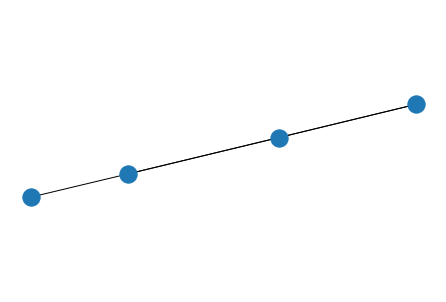

In [32]:
attrs = {0: {'Cases': 20, 'Males': 1, 'Females': 1, 'Age Groups': 1}}
nx.set_node_attributes(G, attrs)
G.nodes[0]['Cases']
nx.draw(G)

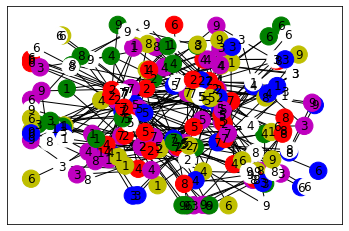

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
import networkx as nx
import random

# Graph initialization
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
G.add_edges_from([(1,2), (3,4), (2,5), (4,5), (6,7), (8,9), (4,7), (1,7), (3,5), (2,7), (5,8), (2,9), (5,7)])
colors = ['r', 'b', 'g', 'y', 'w', 'm']
node_size = [100,200,300,400,500,200,400,300,800]
# Animation funciton
def animate(i):
    nx.draw_circular(G, node_color=[random.choice(colors) for j in range(9)])

#nx.draw_circular(G)
fig = plt.figure()

# Animator call
anim = FuncAnimation(fig, animate, frames=20, interval=200, repeat=True)
anim.save('test.gif', writer='imagemagick')